In [1]:
# 40
import re
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    
    def __repr__(self):
        return f"<{self.surface}>"
    
    def __str__(self):
        return self.surface

docs = ""
with open('ai.ja.txt.parsed') as f:
    docs = f.read()

dic = []
mor = []
for para in docs.split("\n"):
    if para == '' or para[0] == '*':
        continue
    elif para == "EOS":
        if mor != []:
            dic.append(mor)
            mor = []
    else:
        surface, pos, pos1, pos2, pos3, _, _, base, *_ = re.split('[,\t]', para)
        if surface != '':
            mor.append(Morph(surface, base, pos, pos1))

print(len(dic))
print(len(dic[1]))
print(dic[1])

83
105
[<人工>, <知能>, <（>, <じん>, <こうち>, <のう>, <、>, <、>, <AI>, <〈>, <エーアイ>, <〉>, <）>, <と>, <は>, <、>, <「>, <『>, <計算>, <（>, <）>, <』>, <という>, <概念>, <と>, <『>, <コンピュータ>, <（>, <）>, <』>, <という>, <道具>, <を>, <用い>, <て>, <『>, <知能>, <』>, <を>, <研究>, <する>, <計算>, <機>, <科学>, <（>, <）>, <の>, <一>, <分野>, <」>, <を>, <指す>, <語>, <。>, <「>, <言語>, <の>, <理解>, <や>, <推論>, <、>, <問題>, <解決>, <など>, <の>, <知的>, <行動>, <を>, <人間>, <に>, <代わっ>, <て>, <コンピューター>, <に>, <行わ>, <せる>, <技術>, <」>, <、>, <または>, <、>, <「>, <計算>, <機>, <（>, <コンピュータ>, <）>, <による>, <知的>, <な>, <情報処理>, <システム>, <の>, <設計>, <や>, <実現>, <に関する>, <研究>, <分野>, <」>, <と>, <も>, <さ>, <れる>, <。>]


In [2]:
# 41
import copy 
import re

class Chunk:
    def __init__(self, morphs, dst, srcs):
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs
    
    def __repr__(self):
        return f"<{self.morphs} {self.srcs}, {self.dst}>"

docs = ""
with open('ai.ja.txt.parsed') as f:
    docs = f.read()

dic = []
ph = []
ph_dest = []
mor = []
for para in docs.split("\n"):
    if para == '':
        continue
    elif para[0] == '*':
        _, src, dest, *_ = para.split(' ')
        dest = dest[:-1] # 末尾のDを削る
        ph_dest.append(int(dest))
        if mor != []:
            ph.append(mor)
        mor = []
    elif para == "EOS":
        if mor != []:
            ph.append(mor)
        if ph != []:
            for i in range(len(ph)):
                srcs = []
                for j in range(len(ph)):
                    if ph_dest[j] == i:
                        srcs.append(j)
                ph[i] = Chunk(ph[i], ph_dest[i], srcs)
                
            dic.append(ph)
        ph = []
        ph_dest = []
        mor = []
    else:
        surface, pos, pos1, pos2, pos3, _, _, base, *_ = re.split('[,\t]', para)
        if surface != '':
            mor.append(Morph(surface, base, pos, pos1))

print(len(dic))
print(dic[2])

83
[<[<『>, <日本>, <大>, <百科全書>, <(>, <ニッポニカ>, <)』>, <の>] [], 1>, <[<解説>, <で>, <、>] [0], 5>, <[<情報>, <工学>, <者>, <・>, <通信>, <工学>, <者>, <の>] [], 3>, <[<佐藤>, <理>, <史>, <は>] [2], 5>, <[<次>, <の>, <よう>, <に>] [], 5>, <[<述べ>, <て>, <いる>, <。>] [1, 3, 4], -1>]


In [50]:
phrase_from_to = []
for sentence in dic:
    for chunk in sentence:
        if chunk.dst != -1:
            dst_chunk = sentence[chunk.dst]
            frm = ''.join([morph.surface if morph.pos != "記号" else "" for morph in chunk.morphs ])
            to = ''.join([morph.surface if morph.pos != "記号" else "" for morph in dst_chunk.morphs])
            phrase_from_to.append(f"{frm} {to}")

print(len(phrase_from_to))
print(phrase_from_to[:50])

2861
['人工知能 語', 'じんこうちのう 語', 'AI エーアイとは', 'エーアイとは 語', '計算 という', 'という 道具を', '概念と 道具を', 'コンピュータ という', 'という 道具を', '道具を 用いて', '用いて 研究する', '知能を 研究する', '研究する 計算機科学', '計算機科学 の', 'の 一分野を', '一分野を 指す', '指す 語', '語 研究分野とも', '言語の 推論', '理解や 推論', '推論 問題解決などの', '問題解決などの 知的行動を', '知的行動を 代わって', '人間に 代わって', '代わって 行わせる', 'コンピューターに 行わせる', '行わせる 技術または', '技術または 研究分野とも', '計算機 コンピュータによる', 'コンピュータによる 情報処理システムの', '知的な 情報処理システムの', '情報処理システムの 実現に関する', '設計や 実現に関する', '実現に関する 研究分野とも', '研究分野とも される', '日本大百科全書(ニッポニカ)』の 解説で', '解説で 述べている', '情報工学者通信工学者の 佐藤理史は', '佐藤理史は 述べている', '次のように 述べている', '人間の 知的能力を', '知的能力を 実現する', 'コンピュータ上で 実現する', '実現する 技術ソフトウェアコンピュータシステム', '様々な 技術ソフトウェアコンピュータシステム', '技術ソフトウェアコンピュータシステム ある', '応用例は ある', '自然言語処理 機械翻訳かな漢字変換構文解析等', '機械翻訳かな漢字変換構文解析等 専門家の', '専門家の 推論判断を']


In [51]:
# 43
phrase_from_n_to_v = []
for sentence in dic:
    for chunk in sentence:
        dst_chunk = sentence[chunk.dst]
        if chunk.dst != -1 and any([morph.pos == "名詞" for morph in chunk.morphs]) and any([morph.pos == "動詞" for morph in dst_chunk.morphs]):
            frm = ''.join([morph.surface if morph.pos != "記号" else "" for morph in chunk.morphs ])
            to = ''.join([morph.surface if morph.pos != "記号" else "" for morph in dst_chunk.morphs])
            phrase_from_n_to_v.append(f"{frm} {to}")

print(len(phrase_from_n_to_v))
print(phrase_from_n_to_v[:50])

1325
['道具を 用いて', '知能を 研究する', '一分野を 指す', '知的行動を 代わって', '人間に 代わって', 'コンピューターに 行わせる', '研究分野とも される', '解説で 述べている', '佐藤理史は 述べている', '次のように 述べている', '知的能力を 実現する', 'コンピュータ上で 実現する', '技術ソフトウェアコンピュータシステム ある', '応用例は ある', '推論判断を 模倣する', '画像データを 解析して', '解析して 検出抽出したりする', 'パターンを 検出抽出したりする', '画像認識等が ある', '1956年に 命名された', 'ダートマス会議で 命名された', 'ジョンマッカーシーにより 命名された', '命名された 使われている', '現在では 使われている', '記号処理を 用いた', '記述を する', '主体と する', '意味あいでも 使われている', '思考ルーチンも 呼ばれる', 'ことも ある', 'カウンセラーを 模倣した', 'プログラム 出されるが', '人工無脳が 出されるが', '引き合いに 出されるが', '計算機に させようという', '役割を させようという', 'エキスパートシステムと 呼ばれる', '実現は 困難視されている', '人間が 持つ', '暗黙に 持つ', '記述が なり', '問題と なり', '利用が 困難視されている', '困難視されている ある', 'アプローチとしては 知られているが', 'アプローチも 知られているが', '差は ある', '記号的明示性に ある', 'その後 集めた', 'サポートベクターマシンが 集めた']


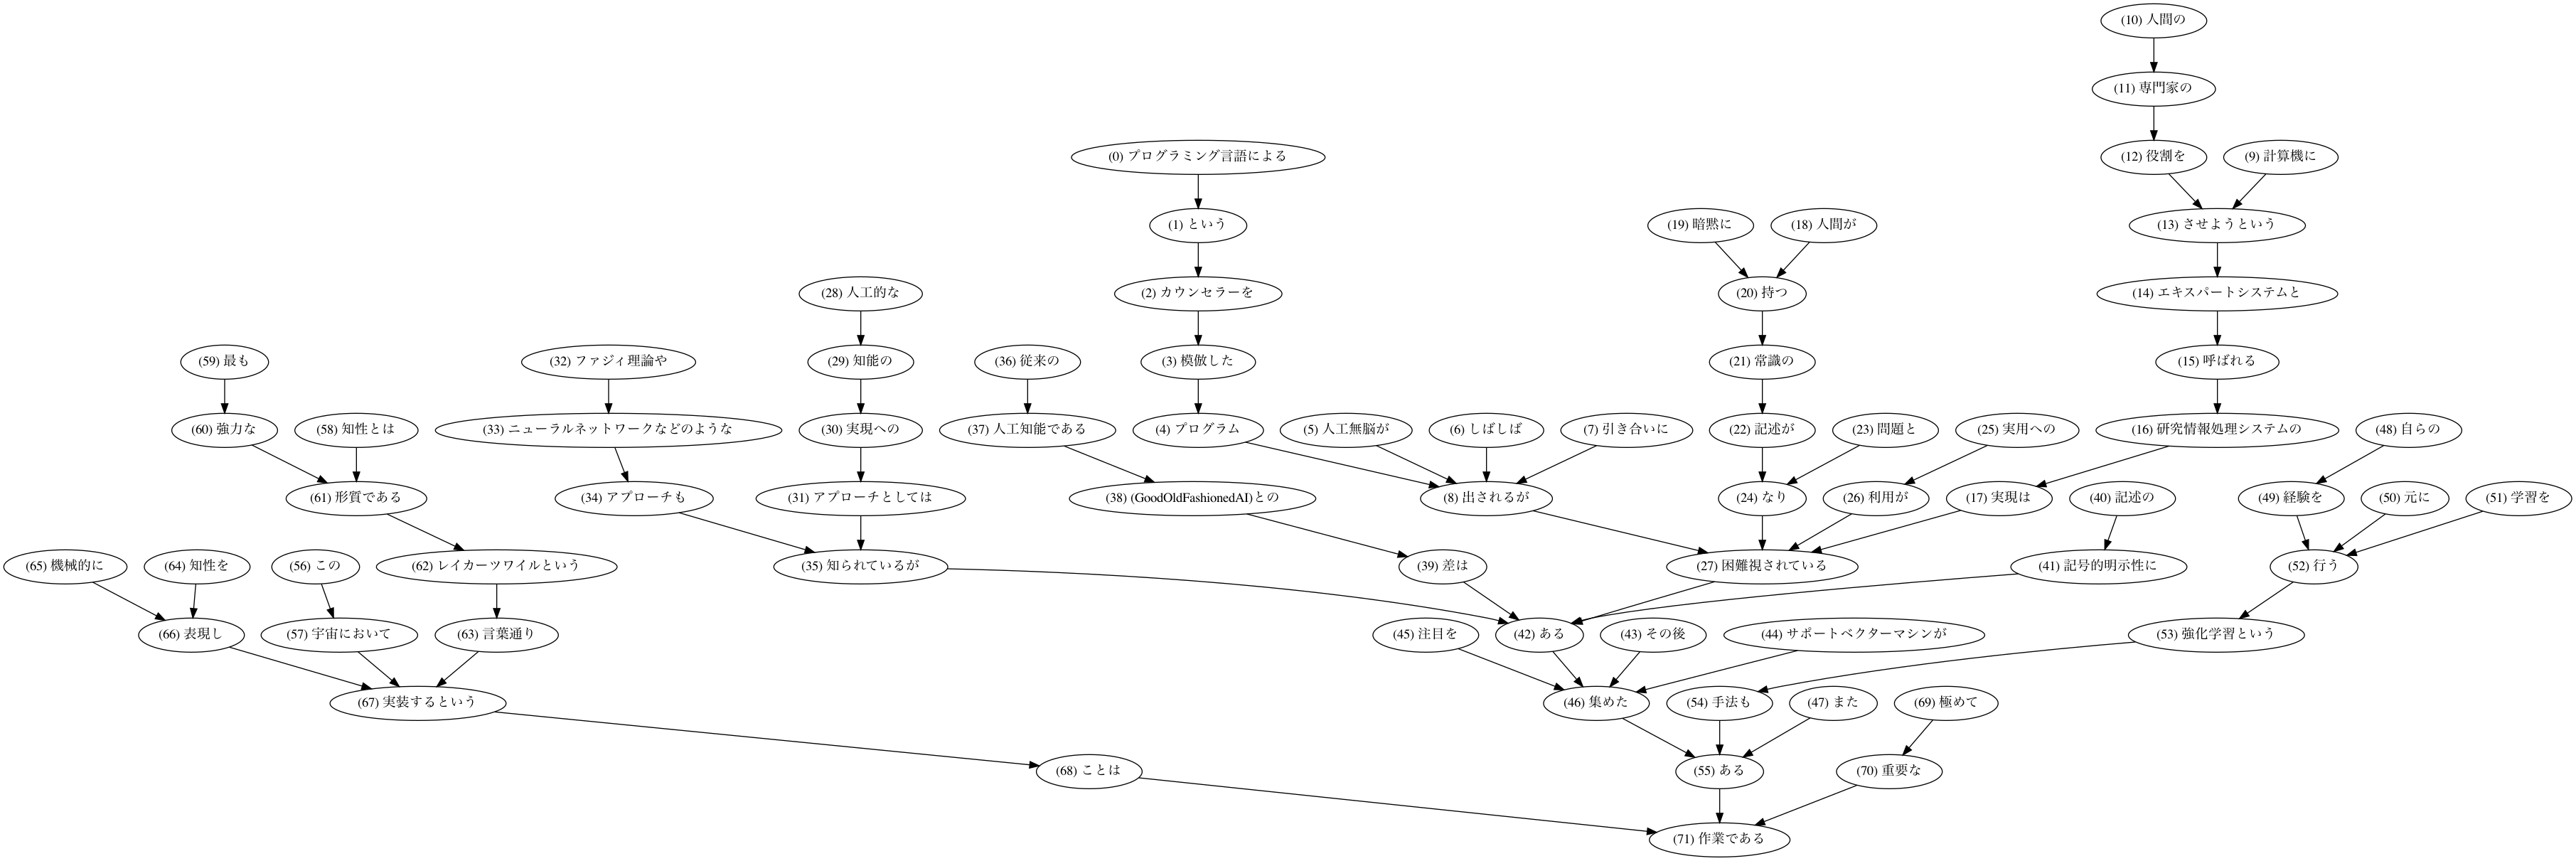

In [21]:
# 44
import pydot
from IPython.display import Image, display_png
from graphviz import Digraph

edges = []

target_sentence = dic[4]
for i, chunk in enumerate(target_sentence) :
    if chunk.dst != -1:
        frm = f'({i}) ' + ''.join([morph.surface if morph.pos != "記号" else "" for morph in chunk.morphs ]) 
        to = f'({chunk.dst}) ' + ''.join([morph.surface if morph.pos != "記号" else "" for morph in target_sentence[chunk.dst].morphs])
        edges.append([frm, to])

n = pydot.Node('node')
g = pydot.graph_from_edges(edges, directed=True)
g.add_node(n)
g.write_png('44.png')
display_png(Image('44.png'))

<[<用い>, <て>] [9], 12>
<[<述べ>, <て>, <いる>, <。>] [1, 3, 4], -1>
<[<実現>, <する>, <、>] [1, 2], 5>
<[<模倣>, <し>, <た>] [2], 4>
<[<超え>, <て>] [9], 12>
<[<呼ば>, <れ>, <、>] [1, 2], 6>
<[<繰り返す>] [4], 6>
<[<統合>, <し>, <た>] [0], 2>
<[<上回る>] [6, 8], 10>
<[<試み>, <られ>, <て>, <き>, <て>, <いる>, <が>, <、>] [2], 9>
<[<提唱>, <し>, <た>] [4, 7], 9>
<[<出版>, <し>, <、>] [2], 6>
<[<なる>, <と>] [0], 5>
<[<行わ>, <れ>, <た>, <、>] [0], 3>
<[<示し>, <た>, <。>] [2, 3, 4, 7], 19>
<[<走行>, <する>] [1, 2], 4>
<[<使わ>, <れる>, <よう>, <に>, <なっ>, <た>, <。>] [0, 1, 2, 3], -1>
<[<提唱>, <し>, <た>, <。>] [0, 2, 3, 4, 8], -1>
<[<上げ>, <た>, <。>] [0, 3, 5, 6], 30>
<[<提唱>, <さ>, <れ>, <た>, <が>, <、>] [0, 3], 15>
<[<流行>, <し>, <た>, <。>] [0, 3, 4], 23>
<[<入っ>, <て>, <、>] [0], 15>
<[<費やし>, <て>] [3, 4], 8>
<[<用い>, <られ>, <て>, <き>, <た>] [3, 4, 6], 8>
<[<取得>, <し>, <て>, <いる>] [1, 2, 5], 7>
<[<持つ>, <よう>, <な>] [0, 1, 2], 4>
<[<モデル>, <化>, <する>] [7, 8, 9], 12>
<[<進ま>, <ず>, <、>] [2, 4, 5], 9>
<[<超越>, <し>, <、>] [4, 6, 7], 13>
<[<提案>, <さ>, <れ>, <た>] [0, 2, 5], 10>
<[<入り>, <、>] [0], 8>

In [121]:
# 45
with open('./45.txt', 'w') as f:
    dep_v = []
    for sentence in dic:
        for chunk in sentence:
            if any([morph.pos == "動詞" for morph in chunk.morphs]):
                verb = ""
                for morph in chunk.morphs:
                    if morph.pos == "動詞":
                        verb = morph.base
                        break
                dep_joshi = []
                for i in chunk.srcs:
                    for morph in reversed(sentence[i].morphs):
                        if morph.pos == "助詞":
                            dep_joshi.append(morph.base)
                            break
                    
                dep_v.append(f"{verb} {' '.join(sorted(list(set(dep_joshi))))}")
    print(len(dep_v))
    print(dep_v[:10])
    print("\n".join(dep_v), file=f)


708
['用いる を', 'する て を', '指す を', '代わる に を', '行う て に', 'する も', '述べる で に は', 'する で を', 'する を', 'する を']


In [127]:
!cat 45.txt | sort | uniq -c | sort -nr | head

51 する を
  20 する が
  19 する と
  17 する に
  13 する は を
  11 よる に
  10 する に を
   9 する で を
   8 する と は
   8 する が に


In [126]:
!cat ./45.txt | grep '行う' | sort | uniq -c | sort -nr | head

8 行う を
   1 行う まで を
   1 行う から
   1 行う に により を
   1 行う に まで を
   1 行う は を をめぐって
   1 行う が て に は
   1 行う で に を
   1 行う て に を
   1 行う が で は


In [91]:
# 46
dep_v_with_frame = []
for sentence in dic:
    for chunk in sentence:
        if any([morph.pos == "動詞" for morph in chunk.morphs]):
            verb = ""
            for morph in chunk.morphs:
                if morph.pos == "動詞":
                    verb = morph.base
                    break
            dep_joshi = []
            dep_frame = []
            for i in chunk.srcs:
                for j, morph in enumerate(reversed(sentence[i].morphs)):
                    if morph.pos == "助詞":
                        dep_joshi.append(morph.base)
                        frame = ""
                        for m in (sentence[i].morphs[:-j] if j != 0 else sentence[i].morphs):
                            frame += m.surface
                        dep_frame.append(frame)
                        break
                
            dep_v_with_frame.append(f"{verb} {' '.join(dep_joshi)} {' '.join(dep_frame)} ")


print(len(dep_v_with_frame))

# 例に挙げられている「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」の解析結果を出力する
[print(v) if any([w == "作り出す" in w for w in v.split(" ")]) else None for v in dep_v_with_frame]
None

708
作り出す は で を ジョン・マッカーシーは 会議で 用語を 


In [121]:
# 47
dep_v_with_frame_s = []
for sentence in dic:
    for chunk_i, chunk in enumerate(sentence):
        if len(chunk.morphs) > 1:
            v_frame = ""
            for i in range(len(chunk.morphs) - 1):
                if chunk.morphs[i].pos == "名詞" and chunk.morphs[i].pos1 == "サ変接続" and chunk.morphs[i+1].pos == "助詞" and chunk.morphs[i+1].surface == "を":
                    v_frame = "".join([m.surface for m in chunk.morphs[i:i+2]])
                    break
            
            if v_frame == "":
                continue
                
            dest_chunk = sentence[chunk.dst]

            if any([morph.pos == "動詞" for morph in dest_chunk.morphs]):
                verb = ""
                for morph in dest_chunk.morphs:
                    if morph.pos == "動詞":
                        verb = morph.base
                        break
                v_frame += verb
                dep_joshi = []
                dep_frame = []
                for i in dest_chunk.srcs:
                    if i == chunk_i:
                        continue
                    for j, morph in enumerate(reversed(sentence[i].morphs)):
                        if morph.pos == "助詞":
                            dep_joshi.append(morph.base)
                            frame = ""
                            for m in (sentence[i].morphs[:-j] if j != 0 else sentence[i].morphs):
                                frame += m.surface
                            dep_frame.append(frame)
                            break
                
            dep_v_with_frame_s.append(f"{v_frame} {' '.join(dep_joshi)} {' '.join(dep_frame)} ")

print(len(dep_v_with_frame_s))
print(dep_v_with_frame_s)

# 例に挙げられている「また、自らの経験を元に学習を行う強化学習という手法もある。」の解析結果を出力する
[print(v) if any(["学習を行う" in w for w in v.split(" ")]) else None for v in dep_v_with_frame_s]
None

75
['行動を代わる に 人間に ', '判断をする   ', '処理を用いる   ', '記述をする と 主体と ', '注目を集める が 「サポートベクターマシン」が ', '経験を行う に を 元に 学習を ', '学習を行う を に 経験を 元に ', '流行を超える   ', '学習を繰り返す   ', '学習をする て は を に を通して なされて ACT-Rでは 推論ルールを 元に 生成規則を通して ', '進化を見せる て は て において 活躍して （敵対的生成ネットワーク）は 加えて 生成技術において ', '生成を行う   ', '開発を行う は エイダ・ラブレスは ', 'テストをする   ', '処理を行う   ', '処理を行う に により に 同年に ティム・バーナーズ＝リーにより Webに ', '意味をする に データに ', '処理を行う て に 付加して コンピュータに ', '研究を進める て 費やして ', '命令をする で 機構で ', '運転をする に 元に ', '特許をする に が 2018年までに 日本が ', '研究をする   ', '運転をする て に 基づいて 柔軟に ', '注目を集める から は ことから ファジィは ', '制御をする   ', '成功を受ける   ', '制御を用いる て も 受けて 他社も ', '制御をする から 少なさから ', '制御をする   ', '進歩を担う   ', '改善を果たす に で が 2012年に 画像処理コンテストで チームが ', 'プログラムを使う   ', '研究を続ける が て ジェフ・ホーキンスが 向けて ', ')をする は 8月には ', '注目を集める に 急速に ', '普及を受ける   ', '学習を組み合わせる   ', '投資を行う に で 全世界的に 民間企業主導で ', '探索を行う で 無報酬で ', '推論をする て 経て ', '研究を始める は とも Googleは マックスプランク研究所とも ', '研究を行う て 始めて ', '開発をする は で 中国では 官民一体で ', '実験をする   ', '開発をする で 日本で ', '投資をする は に 韓国は 2022年までに ', '学習をする   ', 'シミ

In [ ]:
# 48
all_path_n = []
for sentence in dic:
    for chunk in sentence:
        if any([morph.pos == "名詞" for morph in chunk.morphs]):
            grp = []
            chunk_itr = chunk
            while chunk_itr.dst != -1 and chunk_itr.morphs[-1].pos1 != "句点":
                grp.append("".join([m.surface if m.pos != "記号" else "" for m in chunk_itr.morphs]))
                chunk_itr = sentence[chunk_itr.dst]
            all_path_n.append(grp)
                
print(len(all_path_n))
#print(all_path_n)
[print(path) if "作り出した" in path else None for path in all_path_n]
None


In [156]:
# 48
all_path_n = []
for sentence in dic:
    for chunk in sentence:
        if any([morph.pos == "名詞" for morph in chunk.morphs]):
            grp = []
            chunk_itr = chunk
            stc_c = True
            while chunk_itr.dst != -1 and stc_c:
                if chunk_itr.morphs[-1].pos1 == "句点":
                    stc_c = False
                grp.append("".join([m.surface if m.pos != "記号" else "" for m in chunk_itr.morphs]))
                chunk_itr = sentence[chunk_itr.dst]

            all_path_n.append(grp)
                
print(len(all_path_n))
# 「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」の結果を出力する
[print(" -> ".join(path)) if "作り出した" in path else None for path in all_path_n]
None


2410
ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した
